In [1]:
import requests 
import pandas as pd 
import numpy as np 
import random 

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 


from IPython.display import Image 
from IPython.core.display import HTML 

import matplotlib.pyplot as plt 

%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs
    

from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium 

print('Folium installed')
print('Libraries imported.')

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
geopy                     1.18.1                     py_0    conda-forge
Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
folium                    0.5.0                      py_0    conda-forge
Folium installed
Libraries imported.


In [2]:
CLIENT_ID = 'A0YWXXRIB3DJCZMJFZ0MGBQ4JOBU5NXYTCFBWLUXMPB4ZJWQ' 
CLIENT_SECRET = 'SKFY0D5PRRKJUNOBX2TJNEWPKWFCMHSCSQDY0ESWFQI0KYI0' 
VERSION = '20180609'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: A0YWXXRIB3DJCZMJFZ0MGBQ4JOBU5NXYTCFBWLUXMPB4ZJWQ
CLIENT_SECRET:SKFY0D5PRRKJUNOBX2TJNEWPKWFCMHSCSQDY0ESWFQI0KYI0


In [3]:
address = 'Toronto'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.653963 -79.387207


In [4]:
search_query = 'High School'
radius = 120000
print(search_query + ' .... OK!')

High School .... OK!


In [5]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=A0YWXXRIB3DJCZMJFZ0MGBQ4JOBU5NXYTCFBWLUXMPB4ZJWQ&client_secret=SKFY0D5PRRKJUNOBX2TJNEWPKWFCMHSCSQDY0ESWFQI0KYI0&ll=43.653963,-79.387207&v=20180609&query=High School&radius=120000&limit=30'

In [6]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c4bc39b1ed2193b45f6df56'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4b71899cf964a520e24b2de3-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/school_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d13d941735',
         'name': 'High School',
         'pluralName': 'High Schools',
         'primary': True,
         'shortName': 'High School'}],
       'id': '4b71899cf964a520e24b2de3',
       'location': {'address': '675 Royal York Rd.',
        'cc': 'CA',
        'city': 'Etobicoke',
        'country': 'Canada',
        'distance': 9740,
        'formattedAddress': ['675 Royal York Rd.',
         'Etobicoke ON M8Y 2T1',
         'Canada'],
        'labeledLatLngs': [{'label': 'display',
          'lat': 4

In [7]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [8]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Etobicoke School of the Arts,High School,43.630541,-79.503707
1,St. Michaels College School,High School,43.684191,-79.417625
2,Danforth Collegiate and Technical Institute,High School,43.683298,-79.334638
3,St Michaels Choir School,High School,43.655474,-79.377955
4,Keystone International School,High School,43.650620,-79.376154


In [9]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

30 venues were returned by Foursquare.


In [10]:
nearby_venues.to_csv(r'NewTorontoSchoolList.csv', index=False)  

In [11]:
filename = 'NewTorontoSchoolList.csv'
df = pd.read_csv(filename)
df.head()

,name,categories,lat,lng
0,Etobicoke School of the Arts,High School,43.630541,-79.503707
1,St. Michaels College School,High School,43.684191,-79.417625
2,Danforth Collegiate and Technical Institute,High School,43.683298,-79.334638
3,St Michaels Choir School,High School,43.655474,-79.377955
4,Keystone International School,High School,43.650620,-79.376154


In [12]:
address = 'Toronto'

geolocator = Nominatim(user_agent="df")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [13]:
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, school in zip(df['lat'], df['lng'], df['name'], df['categories']):
    label = '{}, {}'.format(df, 'name')
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

In [14]:
x_1 = df["lat"].tolist()
x_2 = df["lng"].tolist()

In [15]:
print(x_1)
print(x_2)

[43.63054137532141, 43.68419073641019, 43.683298400654316, 43.65547433587511, 43.65062, 43.6642585579444, 43.663483, 43.66255208892965, 43.6670414984732, 43.66333692055339, 43.674627, 43.669637, 43.67408868242507, 43.67540761868072, 43.65827, 43.639352661905015, 43.692587907993314, 43.66963156008929, 43.67869075951293, 43.678163032335405, 43.75379530071929, 43.69053491377756, 43.67935053347075, 43.703069232683795, 43.710573593131635, 43.711303082066564, 43.71278549514904, 43.65959909063031, 43.69487441042815, 43.719755341752176]
[-79.50370662184801, -79.41762540201903, -79.33463803706407, -79.37795518002706, -79.376154, -79.38868089155856, -79.379778, -79.37768130084332, -79.40177271281063, -79.40857804946745, -79.379882, -79.410229, -79.36598606669381, -79.35988523262941, -79.432165, -79.43687011481383, -79.4029436182382, -79.33429931035616, -79.43613508039972, -79.32809134861277, -79.46125095749777, -79.43807447150513, -79.32281515290991, -79.42156616458573, -79.39009583025631, -79.3

In [16]:
x_1= np.array(x_1)
X1= x_1 **3
x_2= np.array(x_2)
X2= x_2 **3
print(X1)
print(X2)

[ 83056.15183403  83362.91338449  83357.80493306  83198.62217547
  83170.87107519  83248.85520469  83244.41932282  83239.09509118
  83264.77381091  83243.58382433  83308.17369131  83279.62208223
  83305.09325049  83312.64079842  83214.60713284  83106.48213053
  83410.99580816  83279.5909599   83331.4303903   83328.4099887
  83762.02959397  83399.2386026   83335.20665309  83471.03808391
  83514.04451348  83518.22589911  83526.72342955  83222.20728202
  83424.09158263  83566.68390834]
[-502530.15860702 -500899.60864187 -499331.00532155 -500149.36430458
 -500115.31812884 -500352.13531378 -500183.82109493 -500144.18729945
 -500599.71220776 -500728.43886391 -500185.78705604 -500759.67081984
 -499923.15130385 -499807.87344113 -501174.76969015 -501263.83529156
 -500621.85895123 -499324.60952661 -501249.92074182 -499207.40124925
 -501725.52213915 -501286.63489102 -499107.79942902 -500974.17739282
 -500378.88900998 -500057.90901437 -500577.41293517 -501906.38153697
 -498892.73115831 -500817.467

In [17]:
X1= np.array(X1)
x1= X1 /10000
X2= np.array(X2)
x2= X2 /100000
print(x1)
print(x2)

[ 8.30561518  8.33629134  8.33578049  8.31986222  8.31708711  8.32488552
  8.32444193  8.32390951  8.32647738  8.32435838  8.33081737  8.32796221
  8.33050933  8.33126408  8.32146071  8.31064821  8.34109958  8.3279591
  8.33314304  8.332841    8.37620296  8.33992386  8.33352067  8.34710381
  8.35140445  8.35182259  8.35267234  8.32222073  8.34240916  8.35666839]
[-5.02530159 -5.00899609 -4.99331005 -5.00149364 -5.00115318 -5.00352135
 -5.00183821 -5.00144187 -5.00599712 -5.00728439 -5.00185787 -5.00759671
 -4.99923151 -4.99807873 -5.0117477  -5.01263835 -5.00621859 -4.9932461
 -5.01249921 -4.99207401 -5.01725522 -5.01286635 -4.99107799 -5.00974177
 -5.00378889 -5.00057909 -5.00577413 -5.01906382 -4.98892731 -5.00817467]


In [18]:
colors_map = np.array(['b', 'r'])
def assign_members(x1, x2, centers):
    compare_to_first_center = np.sqrt(np.square(np.array(x1) - centers[0][0]) + np.square(np.array(x2) - centers[0][1]))
    compare_to_second_center = np.sqrt(np.square(np.array(x1) - centers[1][0]) + np.square(np.array(x2) - centers[1][1]))
    class_of_points = compare_to_first_center > compare_to_second_center
    colors = colors_map[class_of_points + 1 - 1]
    return colors, class_of_points

print('assign_members function defined!')

assign_members function defined!


In [19]:
# update means
def update_centers(x1, x2, class_of_points):
    center1 = [np.mean(np.array(x1)[~class_of_points]), np.mean(np.array(x2)[~class_of_points])]
    center2 = [np.mean(np.array(x1)[class_of_points]), np.mean(np.array(x2)[class_of_points])]
    return [center1, center2]

print('assign_members function defined!')

assign_members function defined!


In [20]:
def plot_points(centroids=None, colors='g', figure_title=None):
    # plot the figure
    fig = plt.figure(figsize=(15, 10))  # create a figure object
    ax = fig.add_subplot(1, 1, 1)
    
    centroid_colors = ['bx', 'rx']
    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth=5, markersize=20)
    plt.scatter(x1, x2, s=500, c=colors)
    
    # define the ticks
    xticks = np.linspace(8.3, 8.4, 6, endpoint=True)
    yticks = np.linspace(-5.1, -4.9, 8, endpoint=True)

    # fix the horizontal axis
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    # add tick labels
    xlabels = xticks
    ax.set_xticklabels(xlabels)
    ylabels = yticks
    ax.set_yticklabels(ylabels)

    # style the ticks
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params('both', length=15, width=10, which='major', labelsize=20)
    
    # add labels to axes
    ax.set_xlabel('x1', fontsize=20)
    ax.set_ylabel('x2', fontsize=20)
    
    # add title to figure
    ax.set_title(figure_title, fontsize=24)

    plt.show()


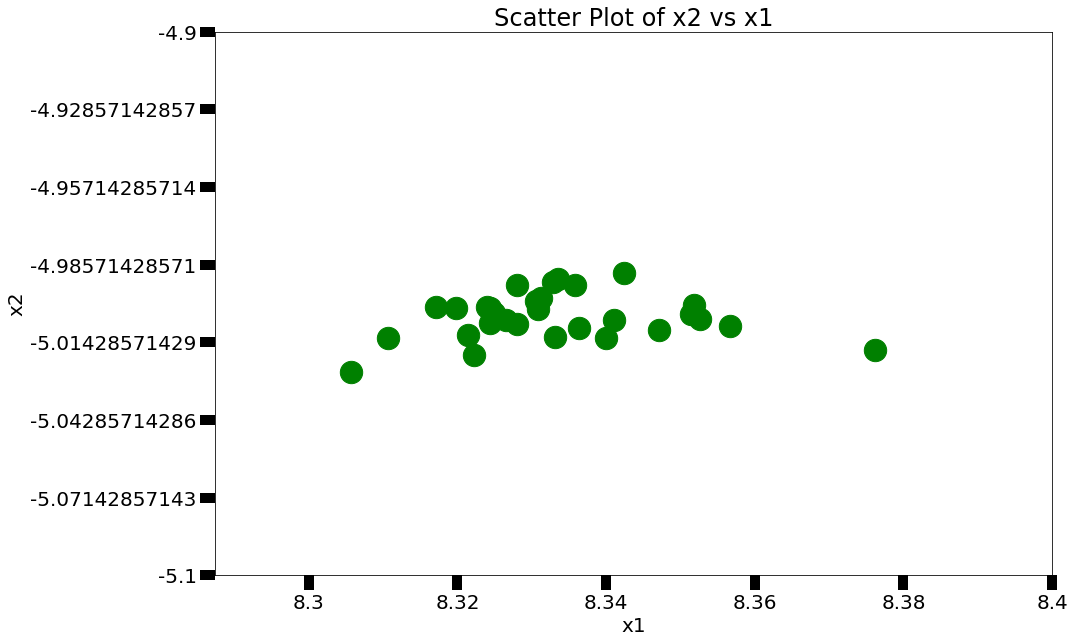

In [21]:
plot_points(figure_title='Scatter Plot of x2 vs x1')

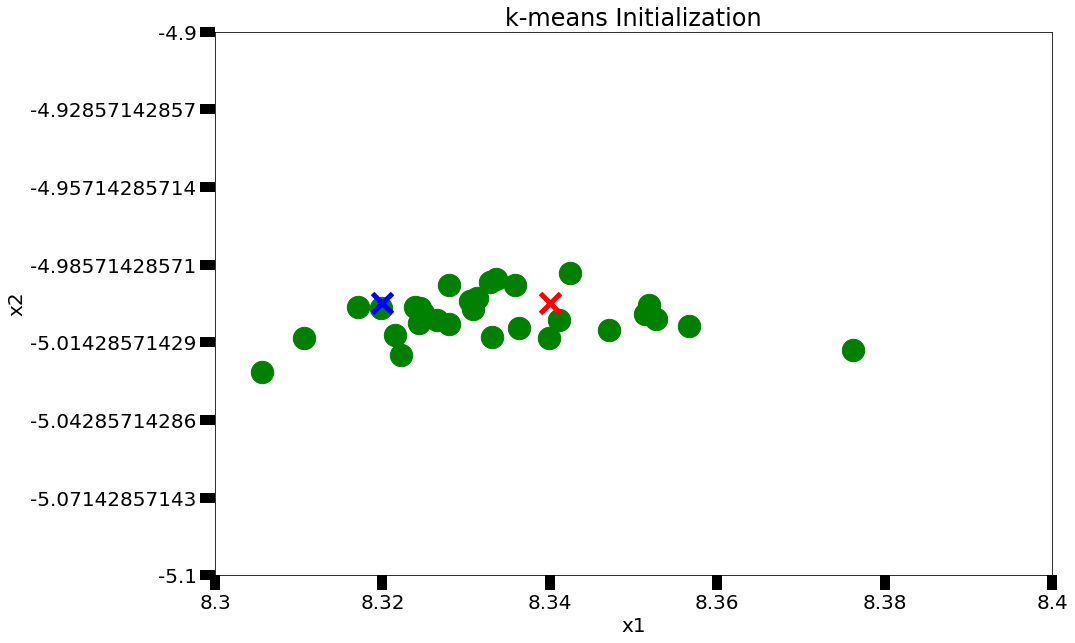

In [22]:
centers = [[8.32, -5], [8.34, -5]]
plot_points(centers, figure_title='k-means Initialization')

Iteration 1 - Press Enter to update the members of each cluster


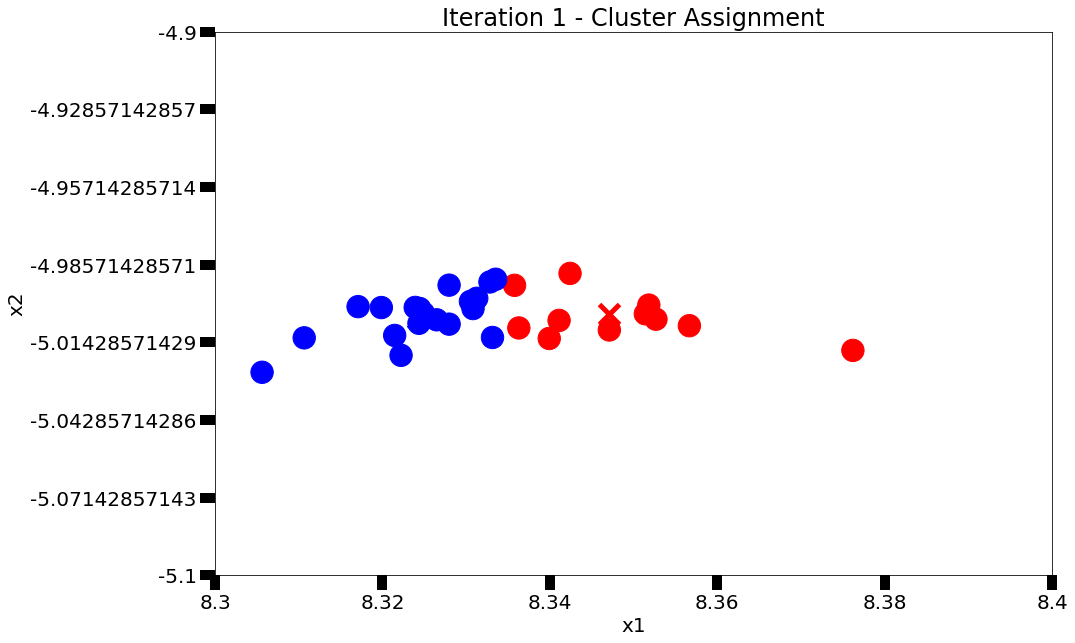

Iteration 1 - Press Enter to update the centers


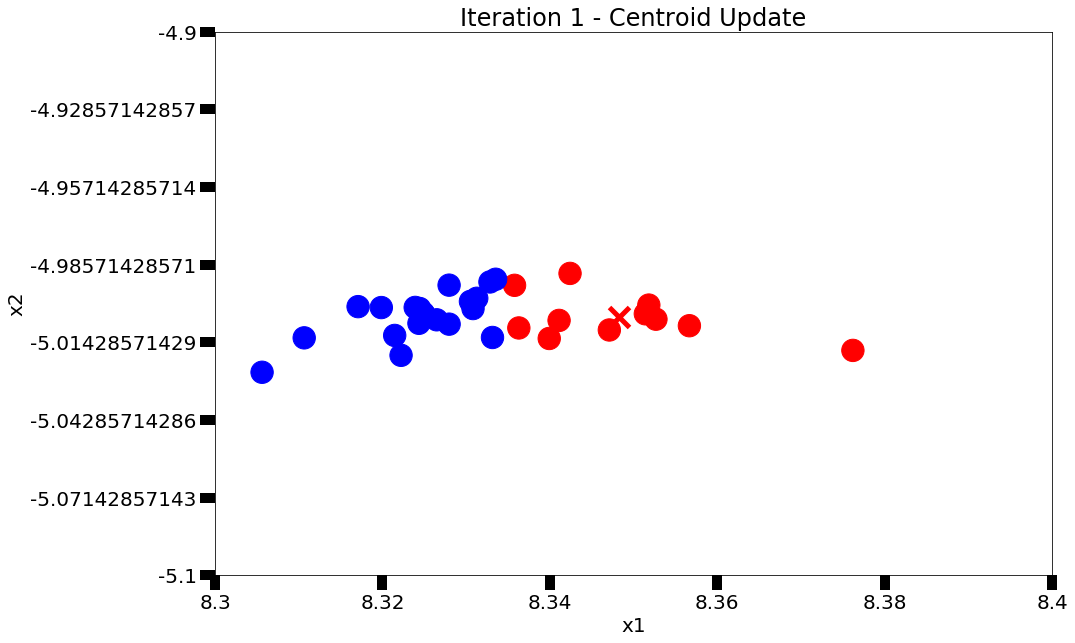

Iteration 2 - Press Enter to update the members of each cluster


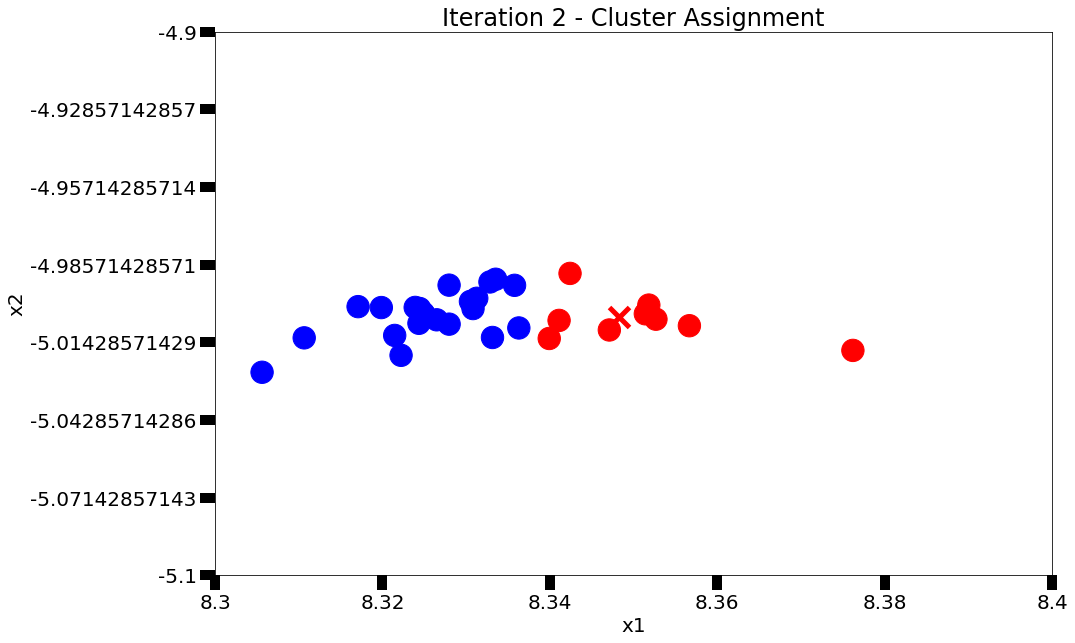

Iteration 2 - Press Enter to update the centers


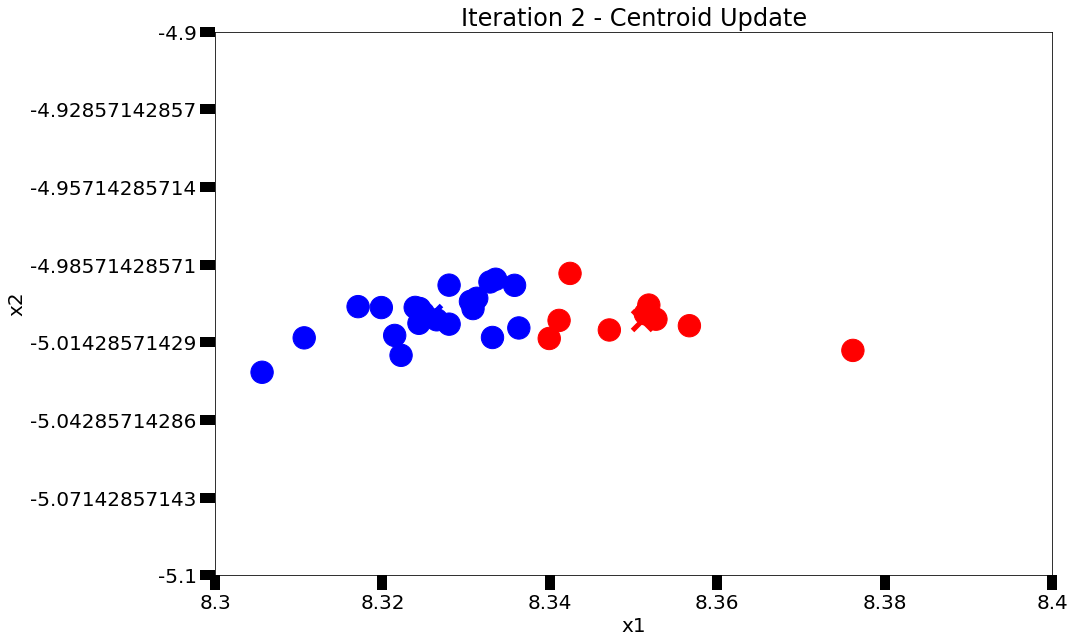

Iteration 3 - Press Enter to update the members of each cluster


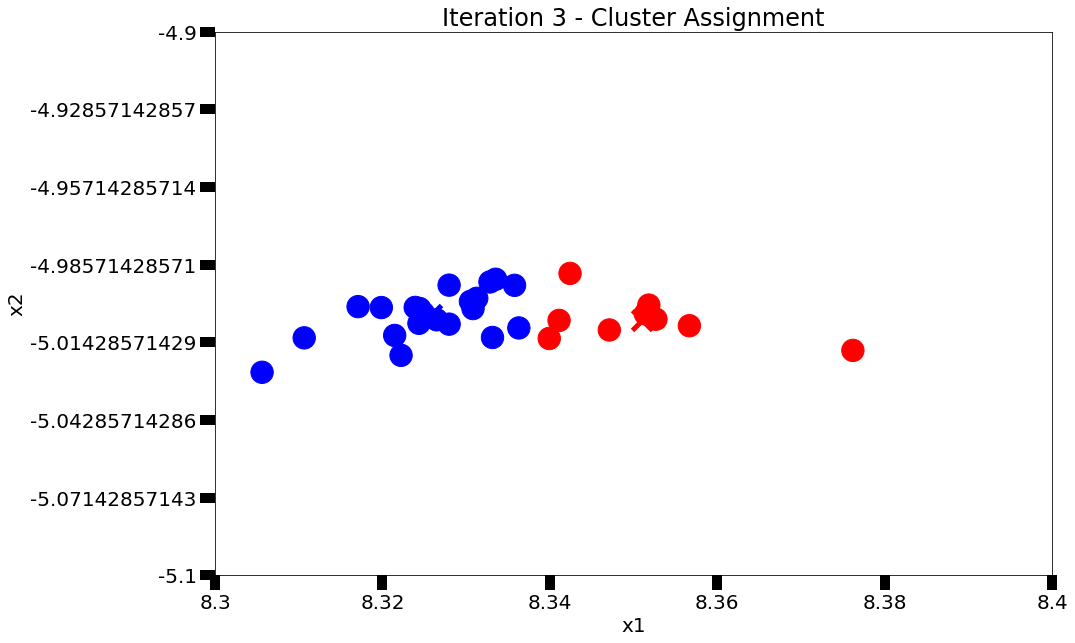

Iteration 3 - Press Enter to update the centers


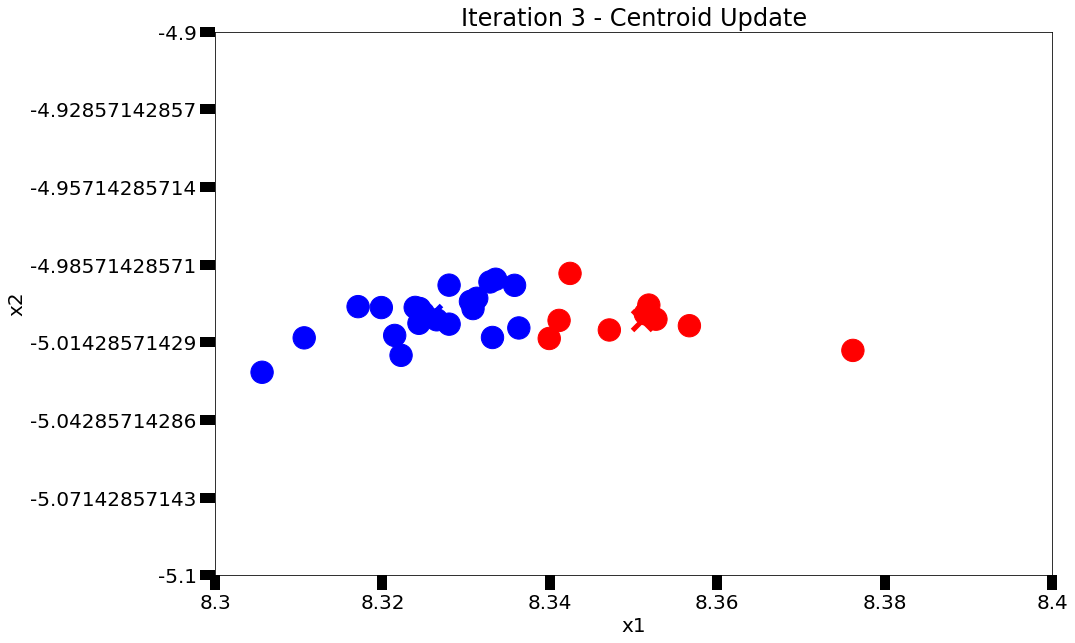

Iteration 4 - Press Enter to update the members of each cluster


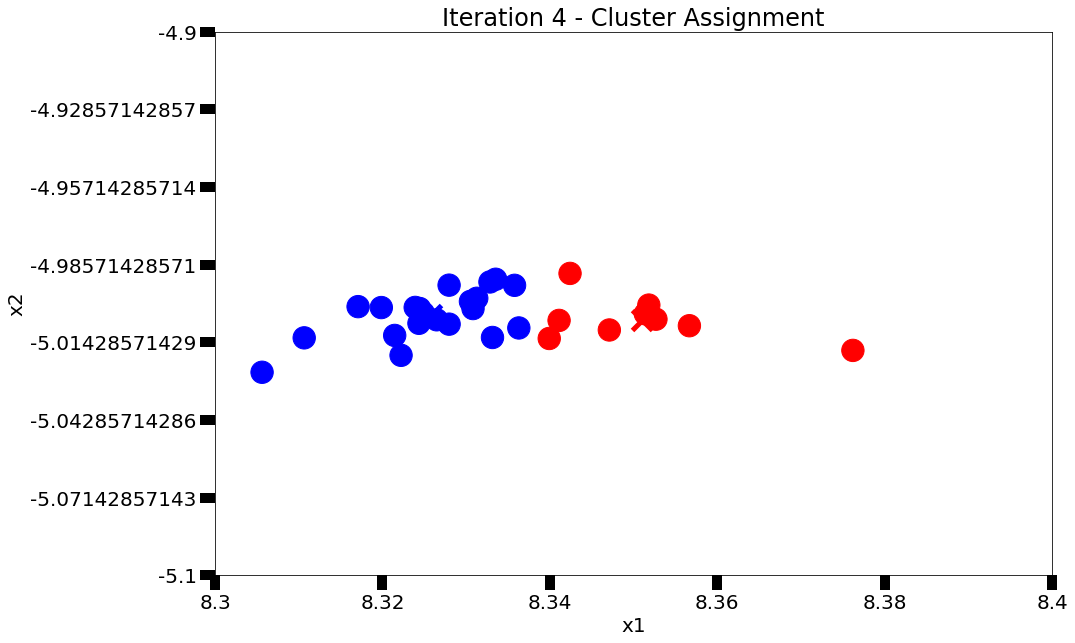

Iteration 4 - Press Enter to update the centers


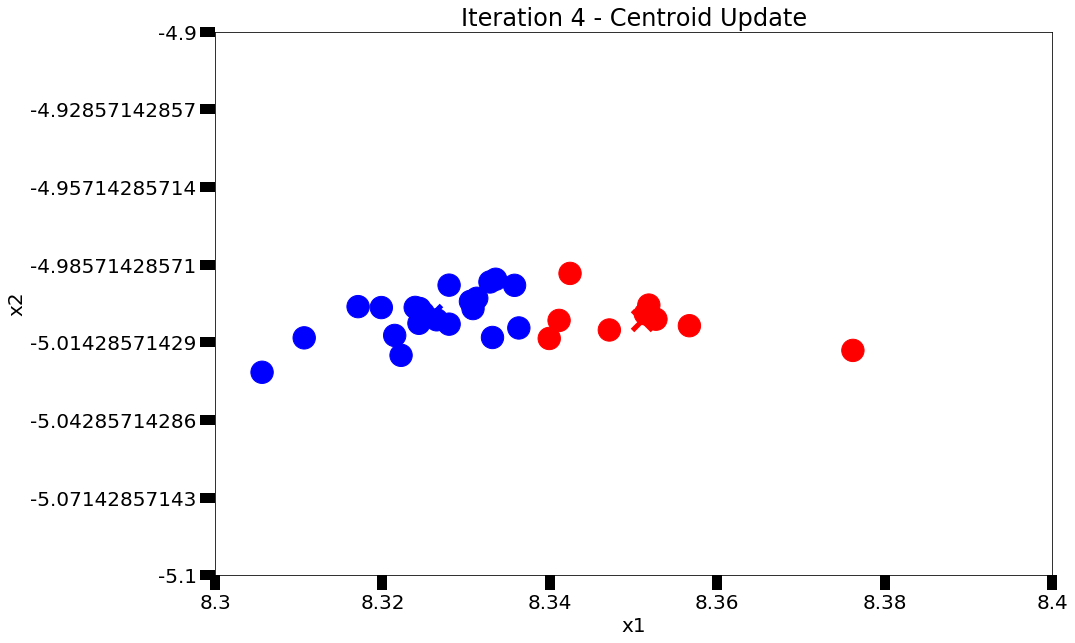

In [24]:
number_of_iterations = 4
for i in range(number_of_iterations):
    input('Iteration {} - Press Enter to update the members of each cluster'.format(i + 1))
    colors, class_of_points = assign_members(x1, x2, centers)
    title = 'Iteration {} - Cluster Assignment'.format(i + 1)
    plot_points(centers, colors, figure_title=title)
    input('Iteration {} - Press Enter to update the centers'.format(i + 1))
    centers = update_centers(x1, x2, class_of_points)
    title = 'Iteration {} - Centroid Update'.format(i + 1)
    plot_points(centers, colors, figure_title=title)

In [28]:
np.random.seed(0)

In [29]:
X, y = make_blobs(n_samples=5000, centers=[[7.31, -5], [9.32, -3]], cluster_std=0.6)

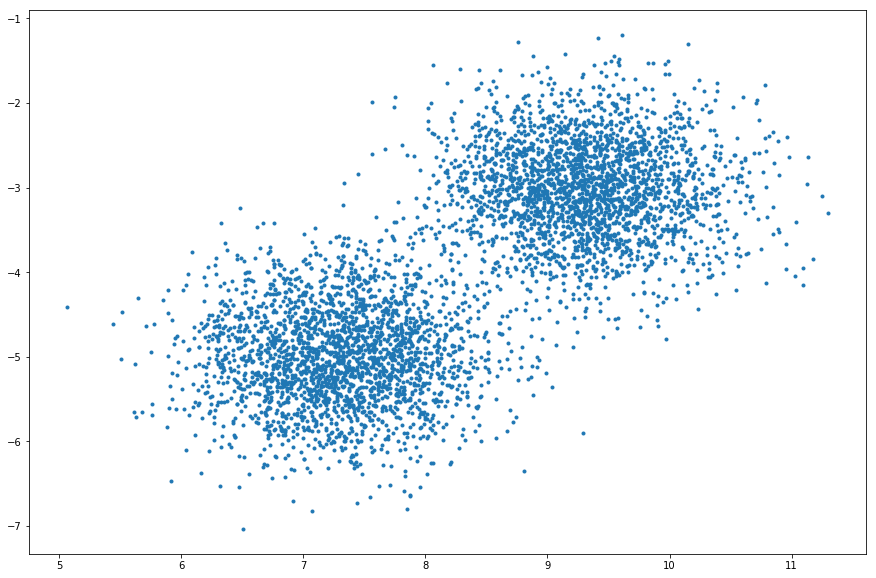

In [30]:
plt.figure(figsize=(15, 10))
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [31]:
k_means = KMeans(init="k-means++", n_clusters=2, n_init=12)

In [32]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=12, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [33]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 1, 1, ..., 0, 0, 0], dtype=int32)

In [34]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 7.29328156, -5.00133833],
       [ 9.31277476, -3.01093913]])

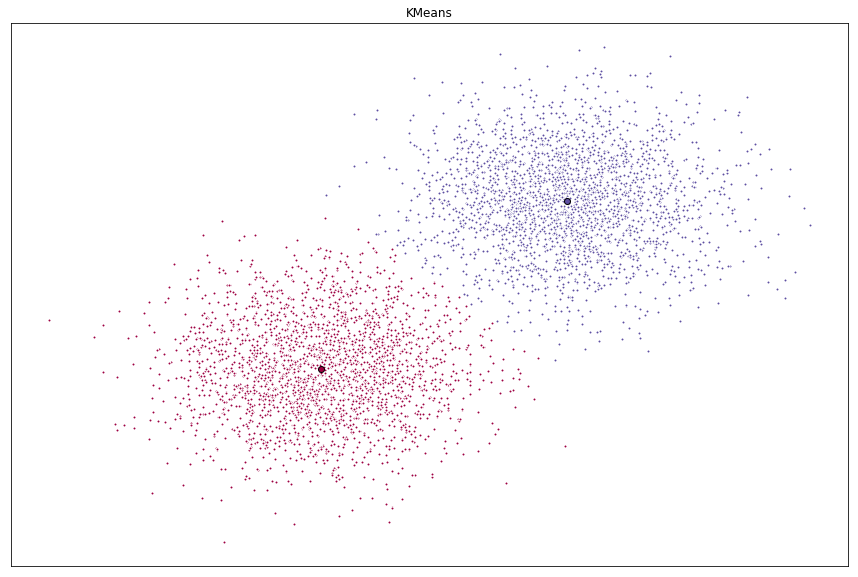

In [35]:
# initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(15, 10))

# colors uses a color map, which will produce an array of colors based on
# the number of labels. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# create a plot
ax = fig.add_subplot(1, 1, 1)

# loop through the data and plot the datapoints and centroids.
# k will range from 0-3, which will match the number of clusters in the dataset.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # create a list of all datapoints, where the datapoitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # plot the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # plot the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# title of the plot
ax.set_title('KMeans')

# remove x-axis ticks
ax.set_xticks(())

# remove y-axis ticks
ax.set_yticks(())

# show the plot
plt.show()


In [36]:
k_means_cluster_centers = k_means.cluster_centers_
print("The K-means cluster is ",k_means_cluster_centers)

The K-means cluster is  [[ 7.29328156 -5.00133833]
 [ 9.31277476 -3.01093913]]
